# Multidimensional Scaling

**Multidimensional scaling** (MDS) is an algorithm used for non-linear dimensionality reduction, and is most often applied to visualize the similarities in datasets. It was one of the earliest developed methods for dimensionality reduction, and MDS has broad applications for high dimensional data in genetics, psychology, sociology, political science, ecology, and many other domains related to modeling structural relationships between objects and conveying their similarities spatially [<sup>1</sup>](#fn1). <br>
<br>
Multidimensional scaling uses pairwise similarity measures (which can be similarity measures of any kind, even qualitative ratings of similarity) to construct a spatial representation that keeps similar objects close together and dissimilar objects further apart. In this way, the goal is to capture the structure of the higher dimensional data in a lower dimensional representation.  

Here's a few examples from the social sciences:

![title](https://user-images.githubusercontent.com/16658498/56078898-bbedda80-5db2-11e9-836f-10ee92766e51.gif)
<font size =2.95>
The figure shows an application of multidimensional scaling in clinical psychology - the spatial representation illustrates dimensions of repetitive thought. The horizontal axis 'Valence' reflects whether the content of thoughts is positive or negative. The vertical axis 'Purpose' reflects whether the tone of thoughts is searching, questioning, and/or uncertain (negative numerical values) or largely solving, planning, and/or certain (positive numerical values). Notice that similar types are close together (self-analysis, reflection) and dissimilar types are further apart (reminiscing, worry) <br>
https://www.apa.org/science/about/psa/2011/03/repetitive-thought </font>

![title](https://user-images.githubusercontent.com/16658498/56078899-c0b28e80-5db2-11e9-8f35-b680e7404af9.png)

<font size =2.95> This figure shows Multidimensional scaling applied to voting patterns of Democrats (blue dots) and Republicans (red dots) in the US House of Representatives. Source: https://en.wikipedia.org/wiki/Multidimensional_scaling#Types <font>

**Goal**: <br>
<br>
MDS differs from many other non-linear dimensionality reduction methods in that the input to MDS is only the dissimilarity matrix, instead of the actual position vectors of the data, and so in this case we also don't actually define a transformation that maps the data into lower dimensions. Given a pairwise dissimilarity matrix $D$ with entries $d_{ij}$ for the distance/dissimilarity between observations $i$ and $j$, we find $x_1, ..., x_n \in \mathbb{R}^k$ such that: <br>
<br>
$$\underbrace{d_{ij}^2}_{\text{original distances}} \approx \underbrace{||x_{i} - x_{j}||^2}_{\text{output configuration}}$$
<br>
We find a configuration (typically a lower dimensional configuration in $\mathbb{R}^2$) that keeps the Euclidean distances in $\mathbb{R}^k$ as close as possible to our original distances/similarities. <br>
<br>
**Note:** the original distances in $D$ do not have to be Euclidean distances. They can be pairwise dissimilarities, even for qualitative comparisons between any type of objects. The algorithm will be slightly modified when the original distances are Euclidean (classical MDS) vs. non-Euclidean or even direct qualitative similarities (metric or non-metric MDS).

### Algorithm Outline (Classical MDS): 
**Input:** Pairwise distances/dissimilarities for n objects given by matrix $D \in \mathbb{R}^{n \times n}$ with entries $d_{ij}$, with one parameter k (specified output dimension)<br>
**Output:** Configuration vectors $x_1, ..., x_n \in \mathbb{R}^k$
<br>
**Steps**: <br>
1. Compute Gram matrix & double centering: from the pairwise dissimilarity matrix find Gram matrix $B \in \mathbb{R}^{n \times n}$ where we double center with $B = \frac{-1}{2} C_n D^{2} C_{n}$<br>
2. Find eigenvalues and eigenvectors: Find eigenvalues $\lambda$ and eigenvectors $\mathbf{v}$ of Gram matrix and form matrices $\mathbf{\Lambda}_{n}=\operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{n}\right)$ and $\boldsymbol{V}_{n}=\left(\boldsymbol{v}_{n}, \ldots, \boldsymbol{v}_{n}\right)$
3. Lower dimensional embedding:  use the top k eigenvectors $v_1, ..., v_k$ (with the largest eigenvalues) and decomposition $X = \sqrt{\Lambda}_{k} V_{k}^{\top}$ to form matrix $X = (x_1, \ldots, x_n)^{T}$ with lower dimensional output vectors $x_i \in \mathbb{R}^k$

**Classical MDS:** When the original distances are Euclidean, we use classical multidimensional scaling and we try to find a configuration so that the configured distances are approximately equal to the original Euclidean distances.

## Step 1: Double Centering and the Gram Matrix

To find the matrix $X$ with the output coordinates, we use the fact that the $n\times n$ Gram matrix $B$ will be defined by the inner products of $X$. <br>
<br>
$$\underbrace{\mathbf{B}}_{n\times n} = \underbrace{\mathbf{X}^T}_{n\times k} \cdot \underbrace{\mathbf{X}}_{k\times n}$$ <br>
Which we write out explicitly as <br>
<br>
$$\mathbf{B} = \mathbf{X^T X} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,k} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,k} \\
\vdots & \vdots & \vdots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,k}
\end{bmatrix} 
\begin{bmatrix}
x_{1,1} & x_{2,1} & \cdots & x_{n,1} \\
x_{1,2} & x_{2,2} & \cdots & x_{n,2} \\
\vdots & \vdots & \vdots & \vdots \\
x_{1,k} & x_{2,k} & \cdots & x_{n,k}
\end{bmatrix}$$ <br>
<br>
The entries of $B$ are given by $b_{ij} = \langle x_i , x_j \rangle = \sum_{k} x_{ik} x_{jk}$. The expression of the gram matrix involving output configuration $X$ is only shown here to illustrate that once we compute the gram matrix, we can then derive the output vectors. However, we will obviously have to use our only input, the dissimilarity matrix, in order to find the gram matrix $B$. 

**Important detail/constraint**: The configuration of our solution will not be unique, as arbitrary translations, rotations, and reflections will not affect the pairwise distances. For example, if we have the solution as matrix $X = [x_1, \ldots, x_n]^{T}$, then we also have the solution $X^* = [x_1 + c, \ldots, x_n + c]^{T}$, translated by some vector $c \in \mathbb{R}^k$: <br>
<br>
$$
\begin{equation}
\begin{aligned}
d_{ij}^2 & \approx ||x_{i} - x_{j}||^2 & \text{since X is a solution}\\
\\
            & = ||(x_{i} + c) - (x_{j} + c)||^2\\
\\
            & = ||x^*_{i} - x^*_{j}||^2\\
\end{aligned}
\end{equation}
$$

Therefore, we must also have $d_{ij}^2 \approx ||x^*_{i} - x^*_{j}||^2$. <br>
<br>
The configurations that result from an arbitrary translation will all be solutions, and similar arguments can show that the pairwise distances will also be unaffected by rotations and reflections. Intuitively, the reasoning is that the distances are only defined pairwise, and not in terms of a global coordinate system.

### Double Centering

To incorporate the translational invariance, we need to center the gram matrix around 0 by subtracting the column and row means from every entry. Double centering is a technique that uses the centering matrix $C_n$: <br>
<br>
$$C_{n} = I_{n} - \frac{1}{n} \mathbf{1}\mathbf{1^T}$$ <br>
where $I_{n}$ is the Identity matrix for dimension $n$, $\mathbf{1}$ is a column vector of n ones, and $\mathbf{1}\mathbf{1^T}$ gives the $n\times n$ matrix of all ones.

For example, $$C_{2} = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} - \frac{1}{2} \begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix} = \begin{bmatrix}
1/2 & -1/2 \\
-1/2 & 1/2
\end{bmatrix} $$

For some matrix $X \in \mathbb{R}^{n \times n}$: $C_{n} X$ subtracts the column means from the entries of $X$, and $X C_{n}$ subtracts the row means from every entry of $X$. Hence, the operation $C_{n}X C_{n}$ removes both row and column means and is referred to as double centering.

We now generate some data and demonstrate the use of the centering matrix in python:

In [379]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plotting style
%matplotlib inline
plt.style.use('seaborn')
#plt.rcParams['figure.facecolor'] = 'white'
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

N = 100 # number of data points
u = 3 + np.random.randn(N) # first feature dimension with mean = 3
v = 7 + np.random.randn(N) # second feature dimensions with mean = 7
X = np.hstack((u.reshape(-1,1),v.reshape(-1,1))) # 100 x 2 data matrix
# view first 5 rows and the column means
X[:5,:]
print('Column 1 mean: ', np.mean(X[:, 0]))
print('Column 2 mean: ', np.mean(X[:, 1]))

array([[4.3106316 , 8.21595994],
       [2.45822232, 5.67343906],
       [2.45379958, 4.95679429],
       [2.55396139, 6.06900592],
       [2.66673975, 7.85723517]])

Column 1 mean:  3.1310551141613514
Column 2 mean:  6.89135978384499


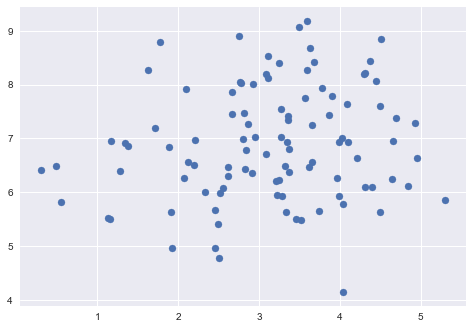

In [380]:
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.jet)
plt.show();

Now we find the pairwise distances with the scikit-learn library, and we plot a heatmap to visualize a corner of the 100x100 distance matrix and a histogram to show the distribution of pairwise distances.

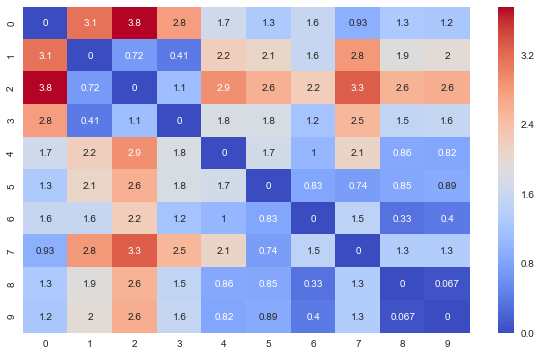

In [381]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.figure(figsize=(10,6))
sns.heatmap(D[:10, :10], cmap="coolwarm", annot=True);

Notice that the distance matrix is symmetric and non-negative with zeros on the diagonal since the distance from every point to itself is zero. Now we define the centering matrix and multiply our data matrix X to remove the column means.

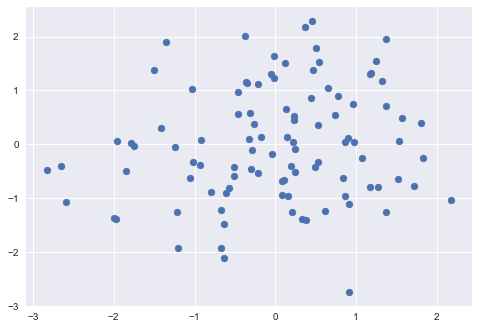

In [382]:
# function to form centering matrix
centering_matrix = lambda n: np.identity(n) -(1/n)*np.ones((n,n))
# multiply by data matrix X
X_centered = np.dot(centering_matrix(100), X)
# plot the centered data:
plt.scatter(X_centered[:, 0], X_centered[:, 1], cmap=plt.cm.jet)
plt.show();

In [367]:
# verify that the pairwise distances are unchanged
D_centered = pairwise_distances(X_centered)
np.allclose(D, D_centered)

True

**Closed Form of the Gram Matrix with Centering:** <br>
<br>
We can now succinctly state the closed matrix form of $B$ by making use of the centering matrix:
<br>
<br>
$$\boxed {B = \frac{-1}{2} C_n D^{2} C_{n}}$$ <br>
**Note:** $C_n$ is the centering matrix with $C_{n} = I_{n} - \frac{1}{n} \mathbf{1}\mathbf{1^T}$ and from the original distance matrix we have $D^{2}$ = matrix with entries ${d_{ij}^2}$

## Step 2: Find eigenvalues and eigenvectors of matrix B

Since the gram matrix $B$ is a real symmetric, positive definite matrix, we know that it will have real eigenvalues and we can use the following eigendecomposition of B in order to find an expression for our output configuration: <br>
<br>
$$
\begin{equation}
\begin{aligned}
B & = V \Lambda V^T\\
\\
            & = {(\Lambda^\frac{1}{2} V^{T})}^T (\Lambda^\frac{1}{2} V^{T})\\
\\
            & = X^T X\\
\end{aligned}
\end{equation}
$$<br>
and therefore we have
<br>
$$X = \sqrt{\Lambda} V^T$$ <br>
where the eigenvalues are given by diagonal matrix $\mathbf{\Lambda}=\operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{n}\right)$ and the eigenvectors are given by the following matrix with the columns set as the eigenvectors $V=\left(v_{1}, \ldots, v_{n}\right)^{T}$

## Step 3: Find coordinates of output configuration

We can now define a k-dimensional configuration by choosing the largest k eigenvalues and the corresponding eigenvectors from k columns of V: <br>
<br>
$$ \boxed{X_{k} = \sqrt{\Lambda_{k}} V_{k}^T}$$

where $\Lambda_{k}$ is the k x k diagonal submatrix of $\Lambda$ and $V_{k}$ is the n x k submatrix of $V$.

There are many different variants of MDS that can be applied in different situations, and so the broad categories are only briefly covered below.

## Metric vs. Non-metric MDS

**Metric MDS** - dissimilarities are quantitative but not necessarily Euclidean (classical MDS is a special case)

For metric MDS, we have loss function defined as: <br>
<br>
$$Stress_{D}\left(x_{1}, x_{2}, \ldots, x_{N}\right)=\left(\sum_{i \neq j=1, \ldots, N}\left(d_{i j}-\left\|x_{i}-x_{j}\right\|\right)^{2}\right)^{1 / 2}
$$ <br>
We attempt to find the configuration $x_1, ..., x_n$ to minimize this error given our input matrix $D$

**Non-metric MDS** - dissimilarities are qualitative (similarity measures are interpreted more as rankings or ordinal classifications) <br>

In the non-metric case, the dissimilarity matrix we are given is only important in its relative ranking of the observations, not the quantitative degree to which observations differ. For non-metric MDS, we have a monotonic function $f$ and we find a configuration that *only preserves relative ranking of the data*. <br>
<br>
If $d_{ij} < d_{ik}, \Rightarrow f(d_{ij}) \leq f(d_{ik})$

Non-metric MDS can also be stated as the problem of finding the optimal configuration $x_1, ..., x_n \in \mathbb{R}^k$ that minimizes the following loss function: <br>
<br>
$$
Stress_{D}\left(x_{1}, x_{2}, \ldots, x_{N}\right)=\sqrt{\frac{\sum(f(x)-d)^{2}}{\sum d^{2}}}
$$

### <font color='blue'> Example - Classical MDS with Handwritten Digits </font>

To get a sense of how MDS works on datasets, the MDS algorithm is implemented below and compared with the `sklearn.manifold` package on the MNIST handwritten digits dataset

(70000, 784)

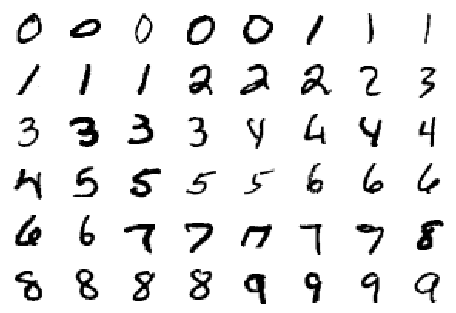

In [383]:
# import digits data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist['data']
y = mnist['target']
mnist.data.shape

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r');

Each of the 70,000 data points is a 784 dimensional vector, where each feature-dimension is a number from 0 to 255 representing pixel intensity. We will attempt to find a 2-dimensional spatial representation that conveys the similarities among the data points and keeps data in the same classes close together.

In [384]:
def ClassicalMDS(dist_matrix, k):
    """Performs Classical Multidimensional Scaling
    Parameters
    ----------
    dist_matrix : Pairwise dissimilarity/distance matrix (n x n)
    k: Dimension of the output configuration
    
    Returns
    -------
    X : Matrix with columns as the output configuration vectors (k x n)
    """
    # get shape of distance matrix                                                                         
    n = dist_matrix.shape[0]
    
    # check distance matrix is symmetric
    if not np.allclose(np.transpose(dist_matrix),dist_matrix):
        print('Distance matrix must be symmetric')
        return
 
    # centering matrix
    C = np.identity(n) -(1/n)*np.ones((n,n))
 
    # compute gram matrix                                                                                    
    B = -(1/2)*C.dot(dist_matrix**2).dot(C)
 
    # solve for eigenvectors and eigenvalues and sort descending                                                   
    w, v = np.linalg.eigh(B)                                                  
    idx   = np.argsort(w)[::-1]
    eigvals = w[idx]
    eigvecs = v[:,idx]
     
    # select k largest eigenvalues and eigenvectors                      
    Lambda  = np.diag(np.sqrt(eigvals[:k]))
    V  = eigvecs[:,:k]
    X  = np.dot(Lambda, np.transpose(V))
    X = np.transpose(X)

    return X

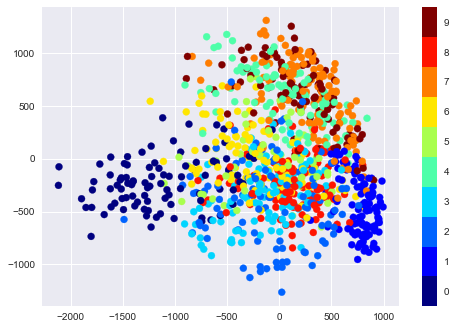

In [401]:
# get a subset of the mnist dataset
sample = np.random.permutation(mnist.data.shape[0])[:1000]
data = mnist.data[sample]
labels = mnist.target[sample]

# compute pairwise distance matrix with sklearn
D = pairwise_distances(data)

# plot results of MDS
X = ClassicalMDS(pairwise_distances(data), 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

MDS does a decent job of keeping similar digits clustered together in the plane. It seems that the 0 and the 1 groups were respectively clustered the closest together. The 0's and 1's are also the furthest apart which makes sense considering they have quite different visual structures.

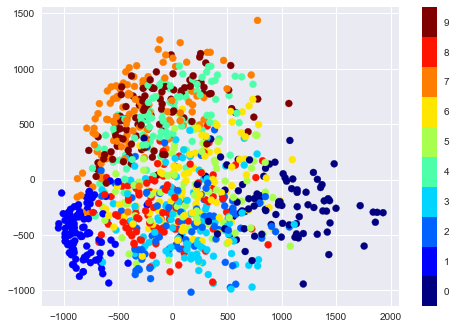

In [399]:
# PCA
from sklearn.decomposition import PCA

model = PCA(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

We now use MDS from the `sklearn.manifold` library

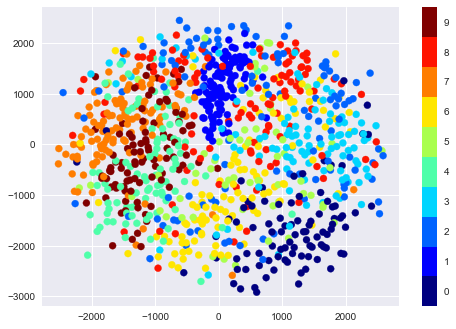

In [404]:
from sklearn.manifold import MDS

model = MDS(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

The scikit-learn implementation uses a variation of the metric MDS algorithm called SMACOF that seems to perform better than the previous classical MDS implementation. There is more apparent segmentation of the digits into the various clusters.

In [ ]:
murder 1 1.00 0.52 0.34 0.81 0.28 0.06 0.11
rape 2 0.52 1.00 0.55 0.70 0.68 0.60 0.44
robbery 3 0.34 0.55 1.00 0.56 0.62 0.44 0.62
assault 4 0.81 0.70 0.56 1.00 0.52 0.32 0.33
burglary 5 0.28 0.68 0.62 0.52 1.00 0.80 0.70
larceny 6 0.06 0.60 0.44 0.32 0.80 1.00 0.55
auto theft 7 0.11 0.44 0.62 0.33 0.70 0.55 1.00

In practice, multidimensional scaling has a broad range of applications and it offers a significant capability to produce spatial representations, even for qualitative similarity comparisons when we only need to input a set of pairwise similarity comparisons. However, MDS is quite limited by the fact that it considers the entire global set of pairwise distances. This significantly limits the ability of MDS to learn non-linear manifold structures. As we will see with the next algorithms, methods based only on the local neighborhoods can more effectively learn the intrinsic structure of the data. 

In [1]:
from IPython.core.display import HTML

def css_styling():
    styles = open("custom_style.css", "r").read()
    return HTML(styles)
css_styling()

___

### References


-  [1] https://en.wikipedia.org/wiki/Multidimensional_scaling
-  [2] https://en.wikipedia.org/wiki/Centering_matrix
-  [3] Wickelmaier, Florian. "An introduction to MDS." Sound Quality Research Unit, Aalborg University, Denmark (2003)

### Notes
<span id="fn1"> **1:**</span>
Perhaps the most fascinating discussion of Multidimensional scaling comes from the cognitive scientist RN Shepard, who proposed a 'Universal law of generalization' to describe perception and mental representations in terms of an underlying mathematical structure, such that the universal laws governing the universe might be reflected in laws that govern conscious minds. He states "Invariance of the laws is achieved by constructing the representational spaces from psychological rather than physical data (using multidimensional scaling) and from considerations of geometry, group theory, and symmetry" (RN Shepard 2004). Shepard also says "These empirical regularities are mathematically derivable from universal principles of natural kinds and probabilistic geometry that may, through evolutionary internalization, tend to govern the behaviors of all sentient organisms" (RN Shepard 1987)